# # Music Recommendation System
# ## Importing Libraries
# ## Data loading

In [2]:
import pandas as pd

file_path = '/Users/taief/Desktop/MUSIC REC/data/data_by_artist.csv'
data_by_artist = pd.read_csv(file_path)
data_by_artist.head()

mode  count  acousticness  \
0     1      9      0.590111   
1     1     26      0.862538   
2     1      7      0.856571   
3     1     27      0.884926   
4     1      7      0.510714   

                                             artists  danceability  \
0                   "Cats" 1981 Original London Cast      0.467222   
1                          "Cats" 1983 Broadway Cast      0.441731   
2        "Fiddler On The Roof” Motion Picture Chorus      0.348286   
3     "Fiddler On The Roof” Motion Picture Orchestra      0.425074   
4  "Joseph And The Amazing Technicolor Dreamcoat"...      0.467143   

     duration_ms    energy  instrumentalness  liveness   loudness  \
0  250318.555556  0.394003          0.011400  0.290833 -14.448000   
1  287280.000000  0.406808          0.081158  0.315215 -10.690000   
2  328920.000000  0.286571          0.024593  0.325786 -15.230714   
3  262890.962963  0.245770          0.073587  0.275481 -15.639370   
4  270436.142857  0.488286          0.009400  0.195000 -10.236714   

   speechiness       tempo   valence  popularity  key  
0     0.210389  117.518111  0.389500   38.333333    5  
1     0.176212  103.044154  0.268865   30.576923    5  
2     0.118514   77.375857  0.354857   34.857143    0  
3     0.123200   88.667630  0.372030   34.851852    0  
4     0.098543  122.835857  0.482286   43.000000    5

# ## Data Cleaning

In [3]:
#check for missing values
print(data_by_artist.isnull().sum())
#check for duplicates
duplicates = data_by_artist.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")
# check missing rows
missing_rows = data_by_artist.isnull().sum()
print(f"Number of missing rows: {missing_rows.sum()}")

mode                0
count               0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64
Number of duplicate rows: 0
Number of missing rows: 0


# ## Data Preprocessing and Feature Engineering
# ### Feature Scaling

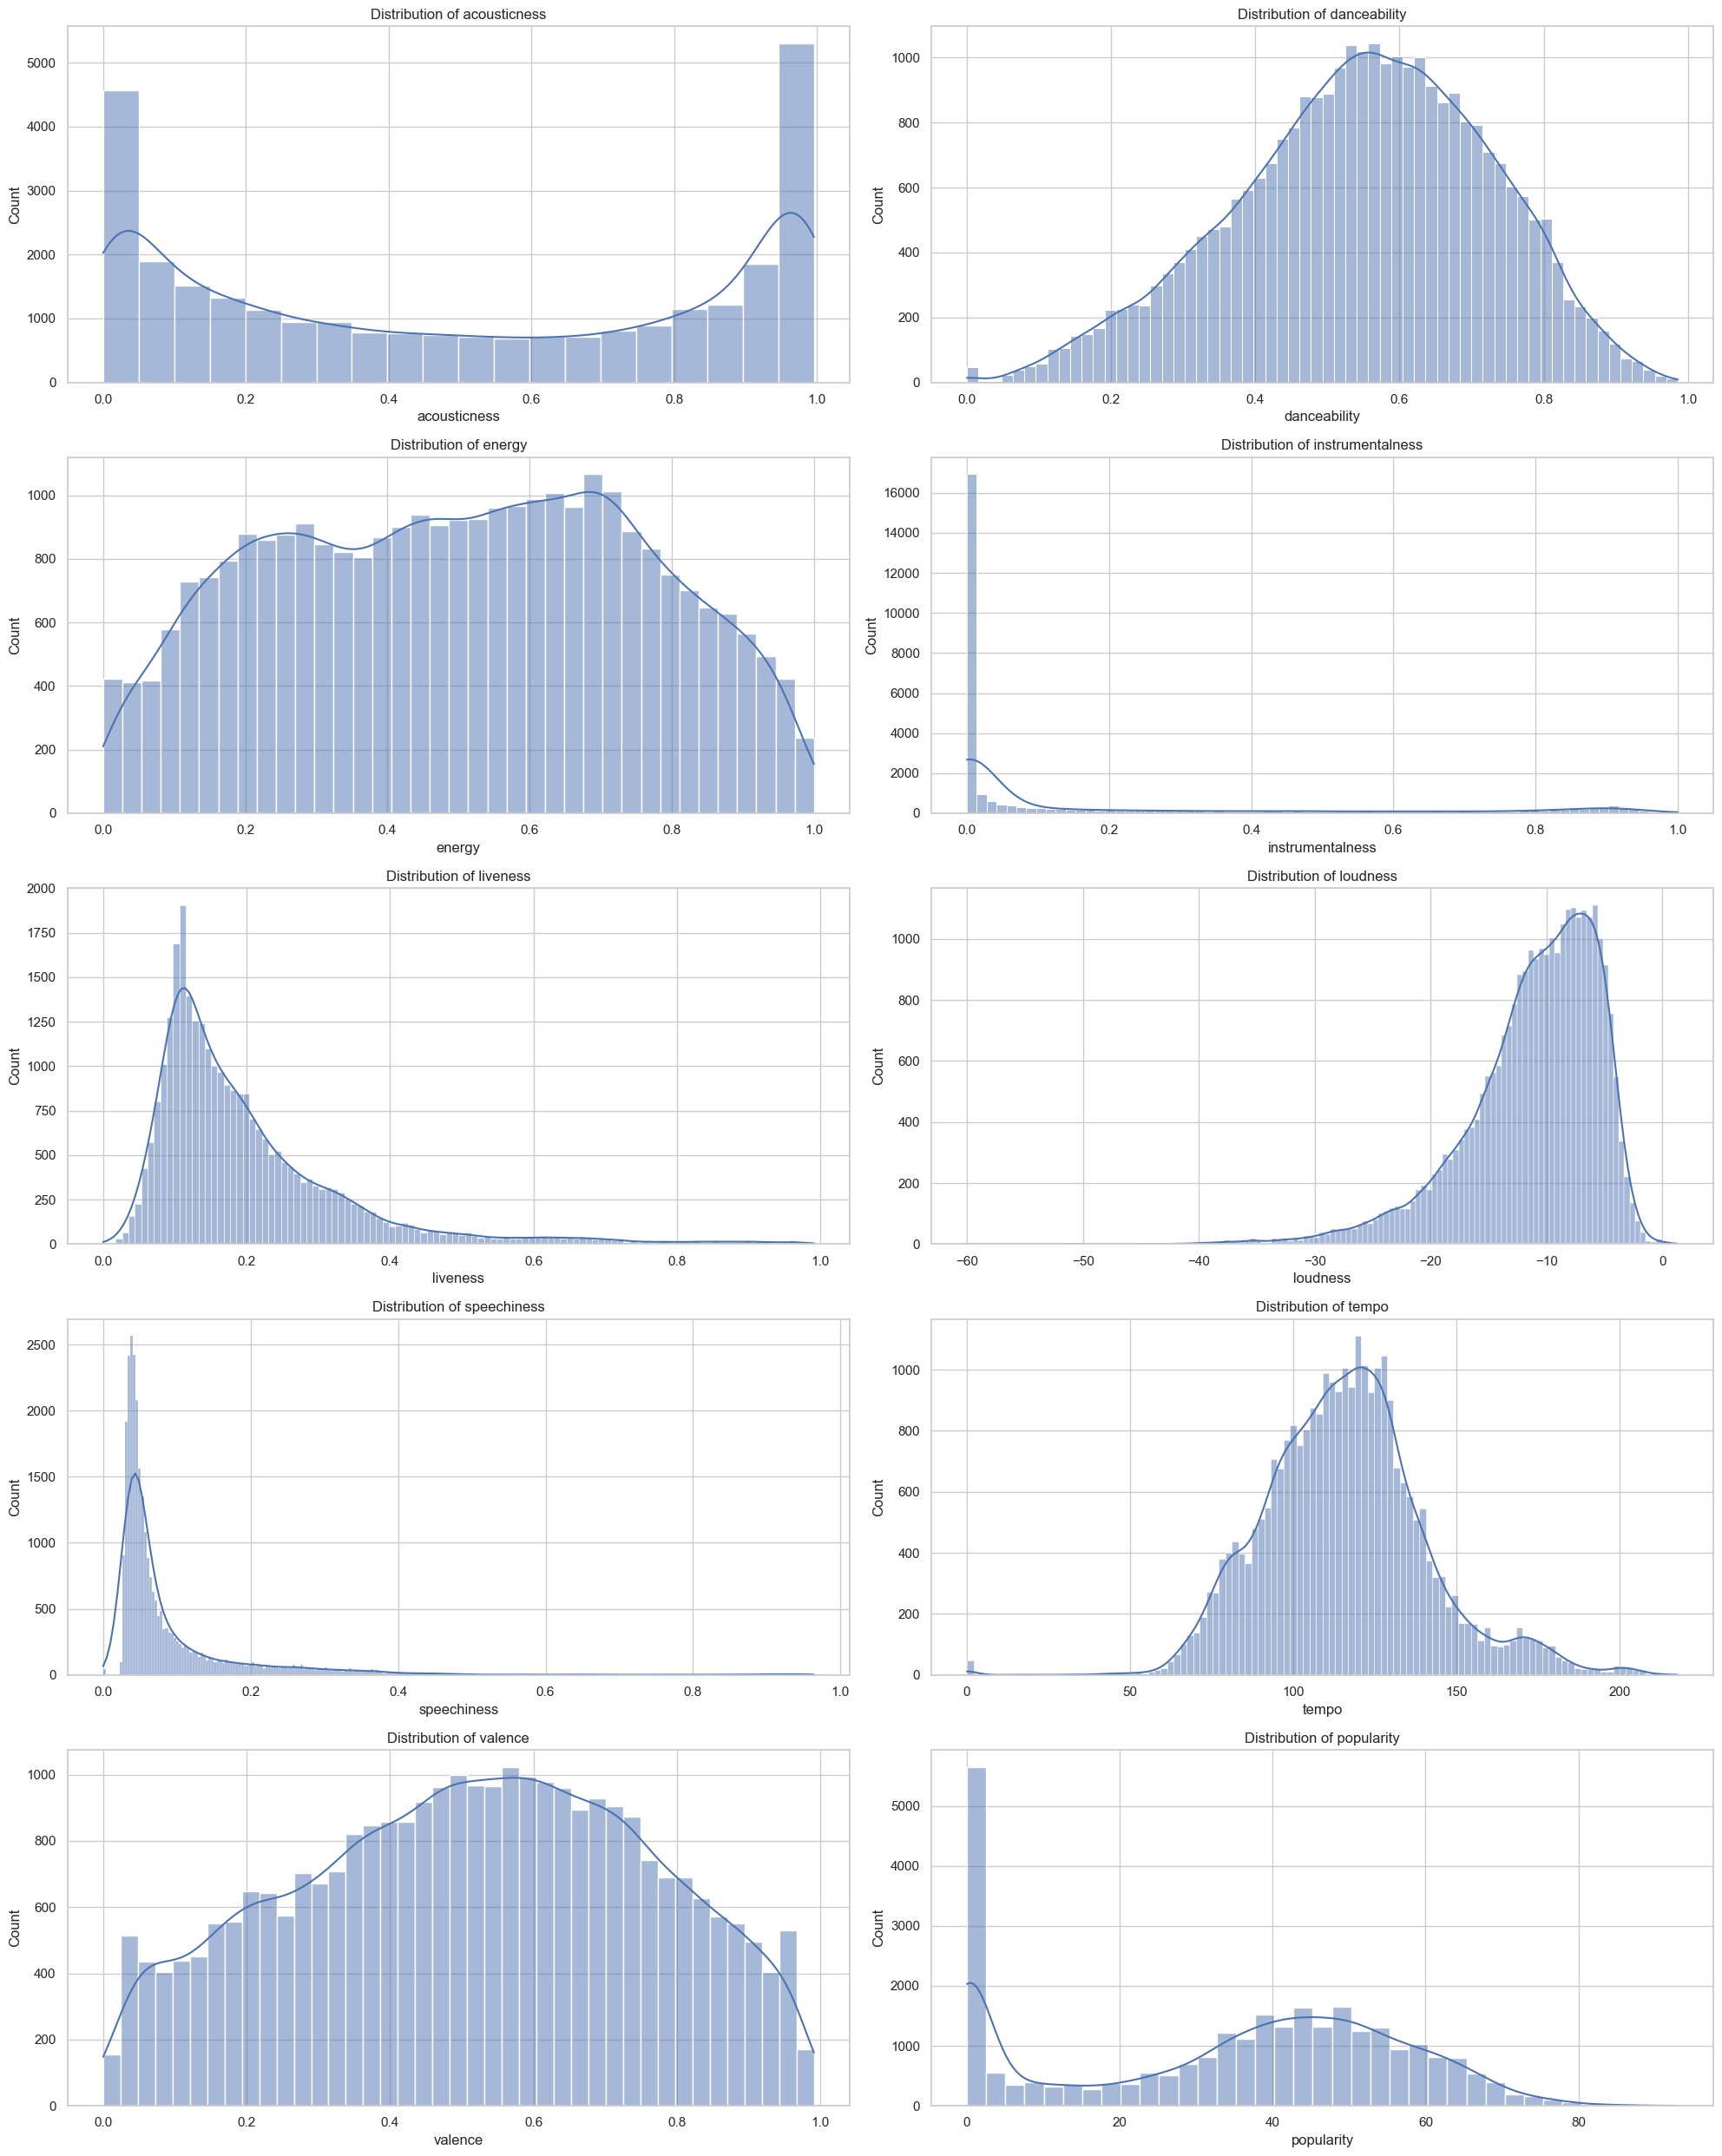

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting visual style for plots
sns.set(style="whitegrid")

# List of features to plot
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']

# Plotting distributions
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 25))
for i, feature in enumerate(features):
    sns.histplot(data=data_by_artist[feature], ax=axes[i//2, i%2], kde=True)
    axes[i//2, i%2].set_title(f'Distribution of {feature}')
plt.tight_layout()

# save plot in plot folder with name distribution_of_features.png
plt.savefig('/Users/taief/Desktop/MUSIC REC/plot/distribution_of_features_artist.png')


# Relation between features and popularity

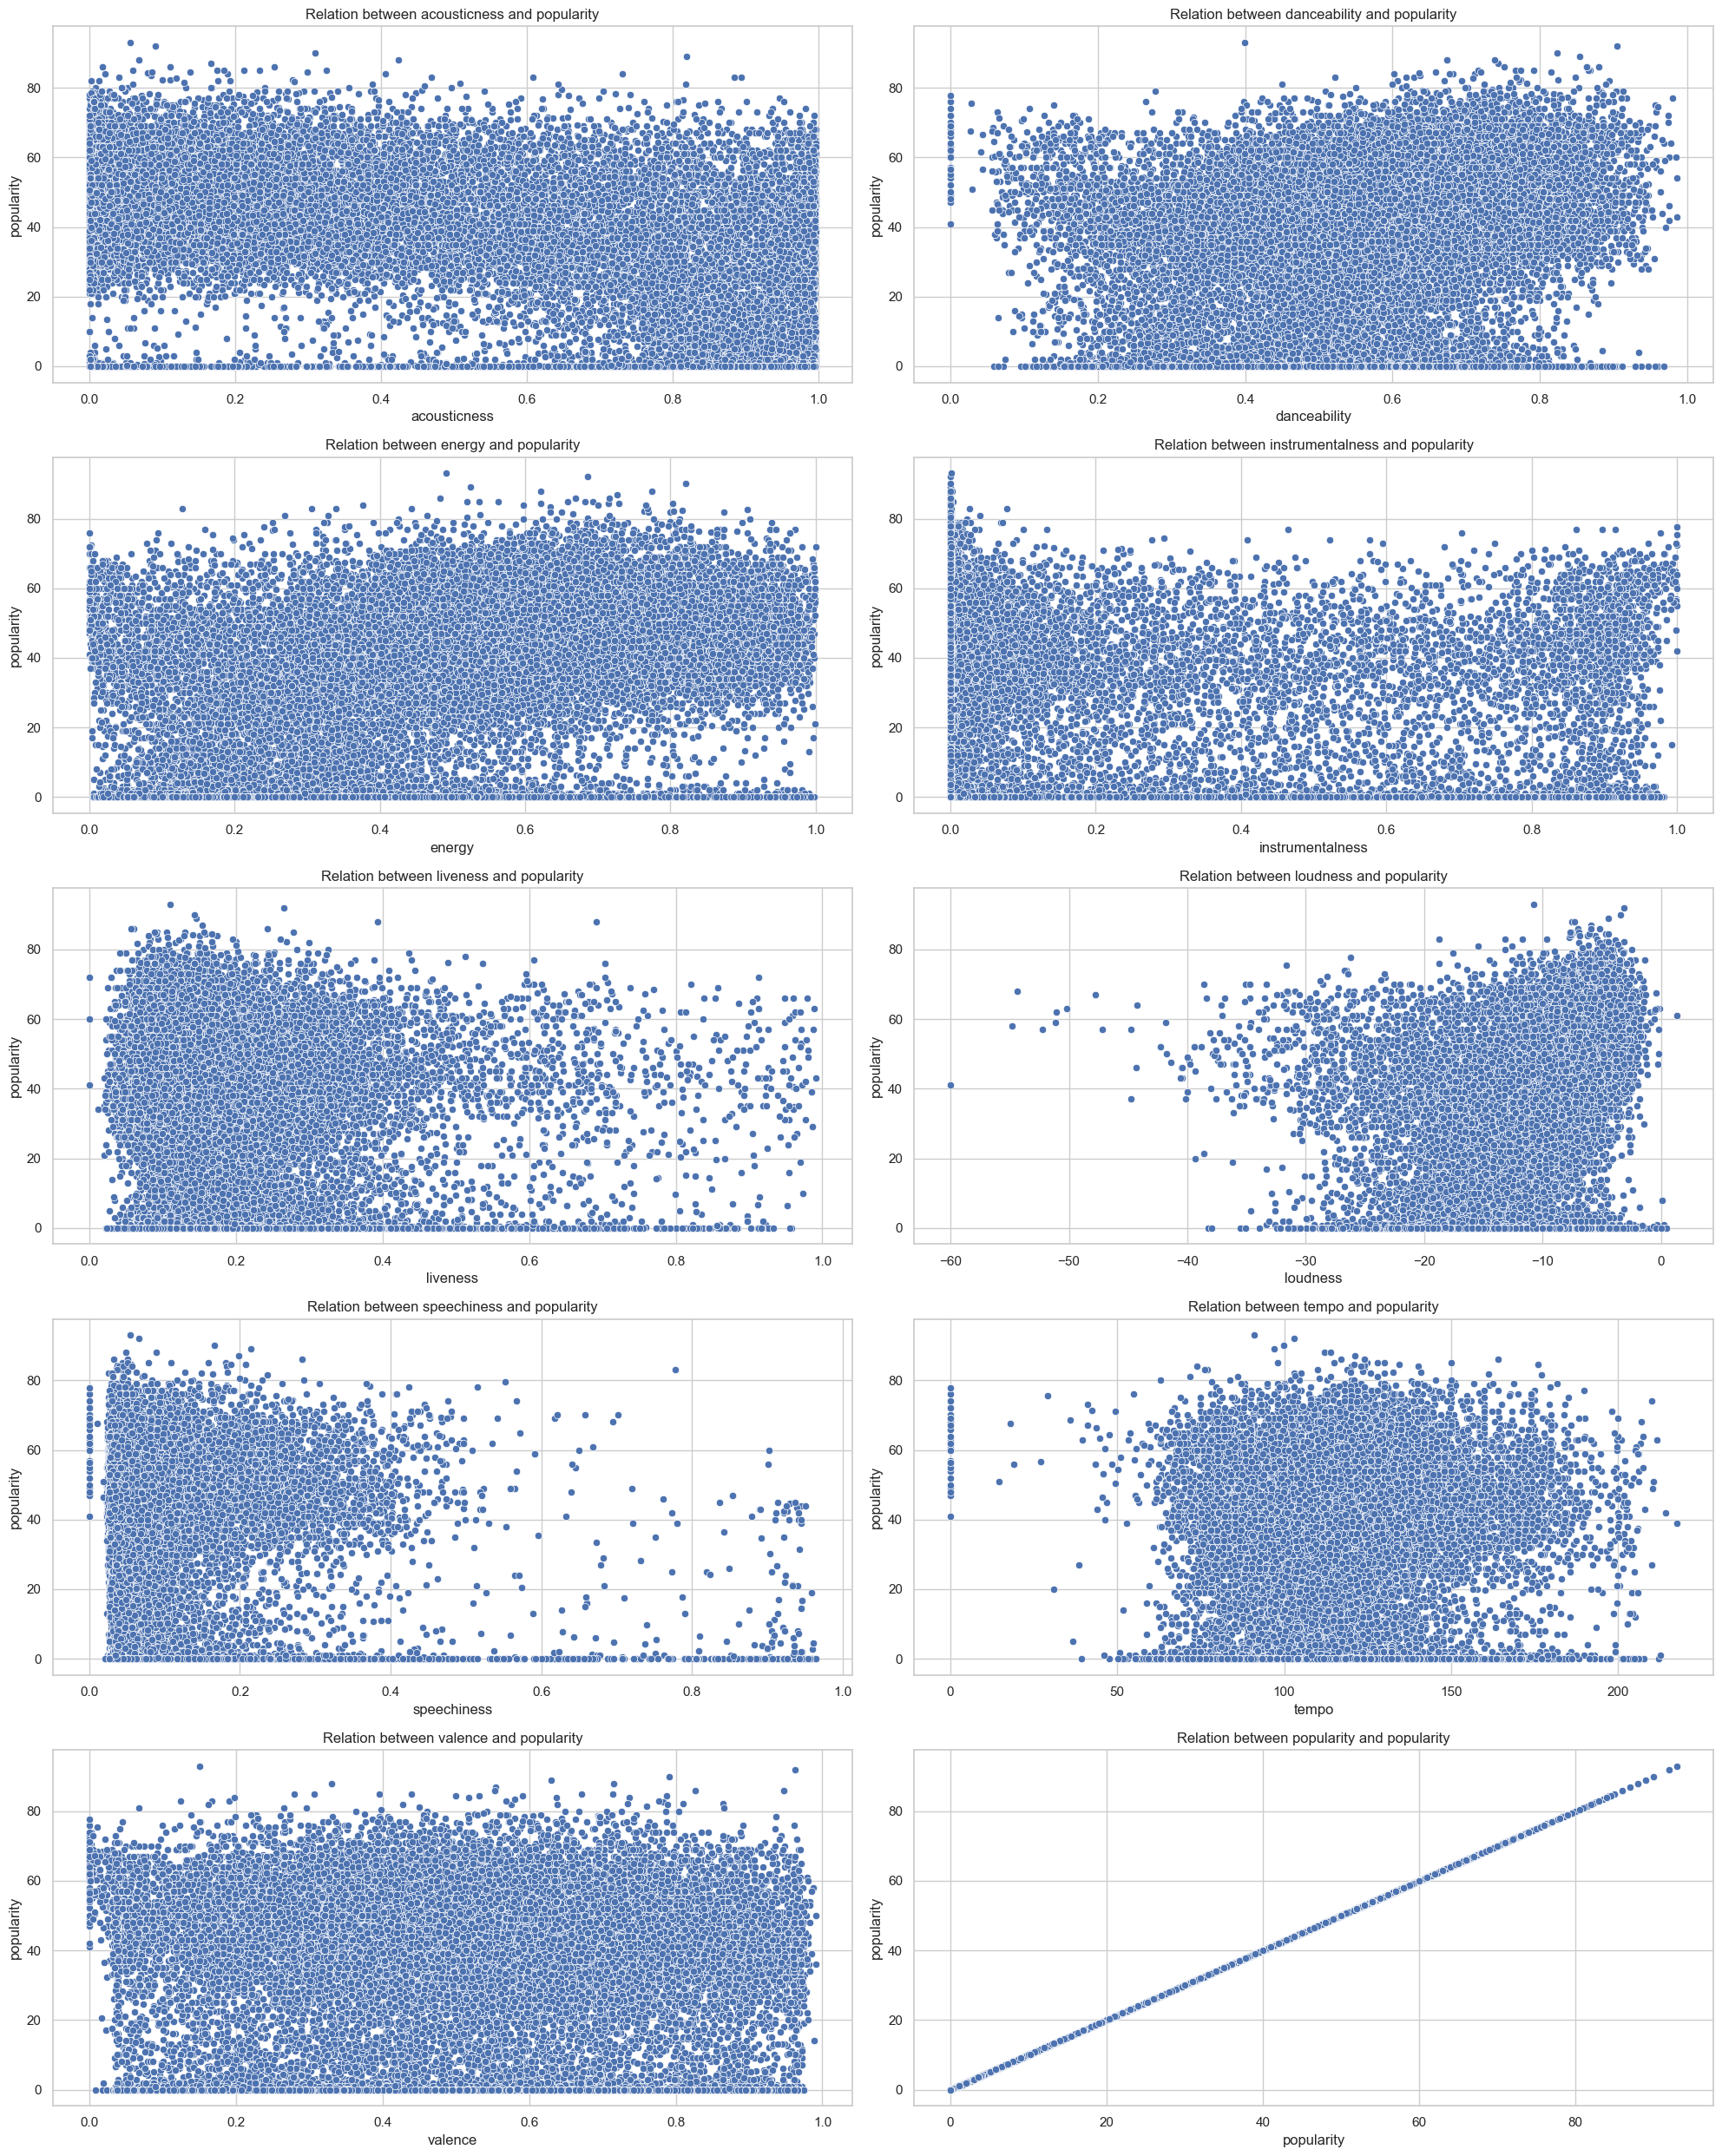

In [8]:
# Plotting relation between features and popularity
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 25))
for i, feature in enumerate(features):
    sns.scatterplot(data=data_by_artist, x=feature, y='popularity', ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Relation between {feature} and popularity')
plt.tight_layout()
# save plot in plot folder with name relation_between_features_and_popularity.png
plt.savefig('/Users/taief/Desktop/MUSIC REC/plot/relation_between_features_and_popularity_artist.png')

# clustering

Text(0.5, 1.0, 'Clusters of Artists')

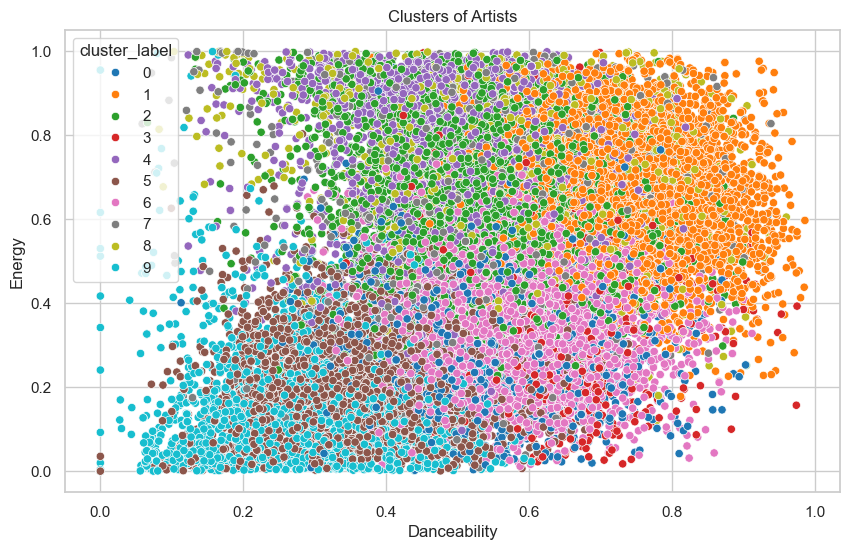

In [9]:
# clustering KMeans
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecting features for clustering (all available features)
features_for_clustering = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']

# Standardizing the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_by_artist[features_for_clustering])

# Applying K-Means Clustering to the dataset

kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Adding the cluster labels to the original DataFrame
data_by_artist['cluster_label'] = clusters

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_by_artist, x='danceability', y='energy', hue='cluster_label', palette='tab10')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Clusters of Artists')




# silhouette score to find the optimal number of clusters

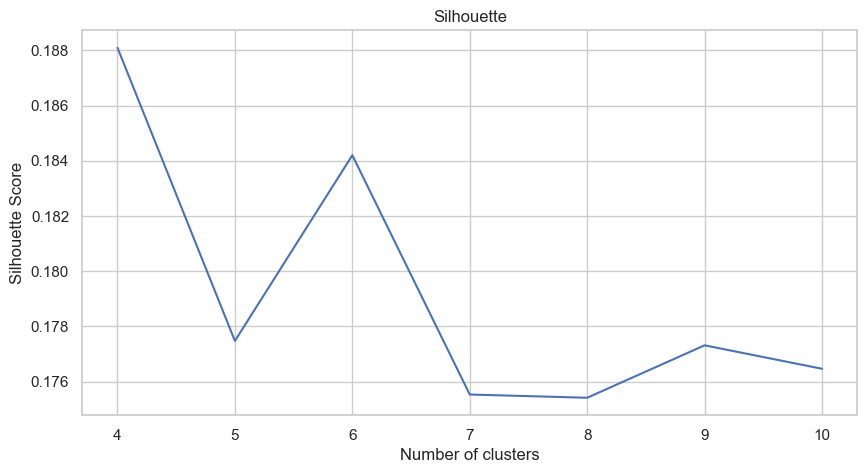

In [11]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(4, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(range(4, 11), silhouette_scores)
plt.title('Silhouette')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.savefig('/Users/taief/Desktop/MUSIC REC/plot/silhouette_score.png')
plt.show()


# Applying K-Means Clustering 6 to the dataset based on silhouette score

In [15]:
kmeans = KMeans(n_clusters=6, random_state=42)
data_by_artist['cluster'] = kmeans.fit_predict(data_by_artist[features_for_clustering])

# Check the size of each cluster
print(data_by_artist['cluster'].value_counts())

cluster
0    7615
3    7215
1    5730
5    3647
4    2995
2    1478
Name: count, dtype: int64


# PCA

In [17]:
# get the centroids of the clusters
centroids = kmeans.cluster_centers_

# create a DataFrame with the centroids
centroids_df = pd.DataFrame(centroids, columns=features_for_clustering)

print(centroids_df)

   acousticness  danceability    energy  instrumentalness  liveness  \
0      0.388576      0.596309  0.568272          0.153031  0.199059   
1      0.582990      0.537835  0.440510          0.188005  0.206119   
2      0.422194      0.469360  0.581261          0.142537  0.205021   
3      0.529991      0.567905  0.477351          0.162674  0.200672   
4      0.735098      0.421710  0.313480          0.298982  0.214455   
5      0.369565      0.546918  0.595487          0.134722  0.196369   

   speechiness       tempo   valence  
0     0.083012  126.287379  0.545659  
1     0.106323   95.326432  0.481392  
2     0.120359  175.832134  0.563039  
3     0.085363  111.153219  0.533524  
4     0.108608   75.064536  0.373017  
5     0.092230  144.557143  0.545746  


# Additional Features clustering

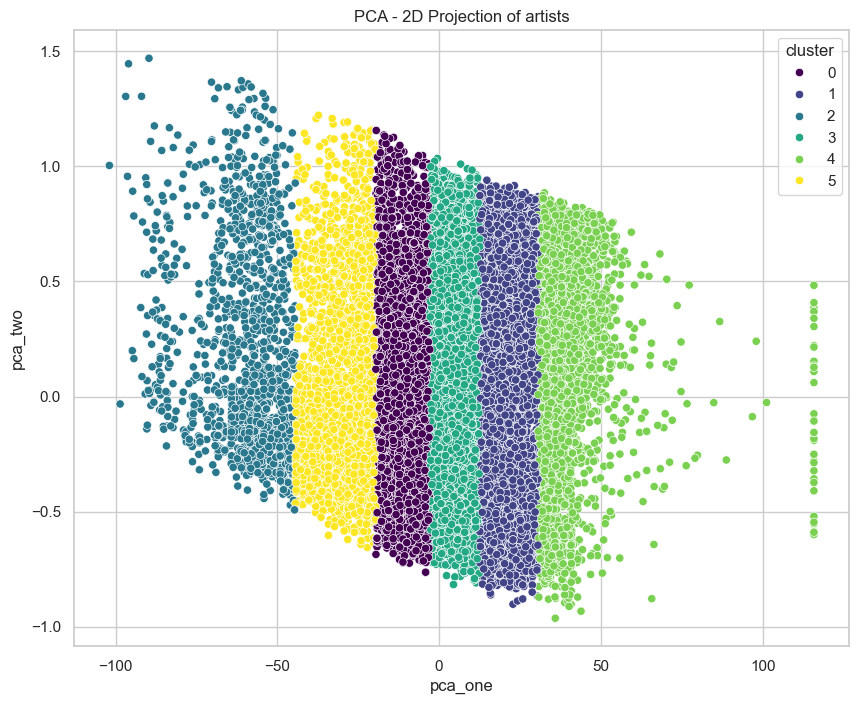

In [19]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the dimensions to 2
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_by_artist[features_for_clustering])

# Add the PCA results to the DataFrame
data_by_artist['pca_one'] = pca_result[:, 0]
data_by_artist['pca_two'] = pca_result[:, 1]

# Visualize the PCA result
plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca_one', y='pca_two', hue='cluster', data=data_by_artist, palette='viridis')
plt.title('PCA - 2D Projection of artists')
plt.savefig('/Users/taief/Desktop/MUSIC REC/plot/PCA_of_artists.png')
plt.show()


# Assigning cluster labels
# Save the enhanced data with cluster labels


In [28]:
def assign_cluster_name(centroid):
    # Define thresholds for categorizing features
    thresholds = {
        'high_instrumentalness': 0.7,
        'high_speechiness': 0.7,
        'medium_danceability': 0.5,
        'medium_energy': 0.5,
        'medium_valence': 0.5,
        'medium_acousticness': 0.5
    }

    # First check for highly instrumental or speechy music
    if centroid['instrumentalness'] > thresholds['high_instrumentalness']:
        return 'Highly Instrumental'
    if centroid['speechiness'] > thresholds['high_speechiness']:
        return 'Wordy'

    # Second, check for Acoustic and energetic music, and positive vibes
    labels = []
    if centroid['danceability'] > thresholds['medium_danceability'] and centroid['energy'] > thresholds['medium_energy']:
        labels.append('Energetic Dance')
    if centroid['valence'] > thresholds['medium_valence']:
        labels.append('Positive Vibes')
    if centroid['acousticness'] > thresholds['medium_acousticness']:
        labels.append('Acoustic')

    # Finally, check for vocally rich music
    if not labels:
        if centroid['instrumentalness'] < 0.3:
            return 'Vocally Rich'
        return 'Varied'  # Use 'Varied' for centroids that don't fit other categories

    # Return the combined labels, or 'Varied' if no specific characteristics stand out
    return ', '.join(labels)  # Using comma as separator for readability

# Example usage:
cluster_name = assign_cluster_name(centroid_example)
print(cluster_name)


Energetic Dance, Positive Vibes


In [34]:
# Apply the mapping to your DataFrame
data_by_artist['cluster_name'] = data_by_artist.apply(lambda row: assign_cluster_name(row[features_for_clustering]), axis=1)

# show head
#print(data_by_artist[['artists', 'cluster', 'cluster_name']].head(20))

#print one artist cluster name
print(data_by_artist[data_by_artist['artists'] == 'Linkin Park']['cluster_name'])

# Save the enhanced data with cluster labels
data_by_artist.to_csv('/Users/taief/Desktop/MUSIC REC/data/data_by_artist_with_clusters.csv', index=False)


14706    Energetic Dance
Name: cluster_name, dtype: object
